In [111]:
%load_ext autoreload
%autoreload 2

%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
import numpy as np
import matplotlib.pyplot as plt

import importlib

import snapshot_obj
import trace_halo
import dataset_compute
import subhalo

In [113]:
importlib.reload(snapshot_obj)
importlib.reload(trace_halo)
importlib.reload(dataset_compute)
importlib.reload(subhalo)

<module 'subhalo' from '/home/kasper/Curvaton_Simulations/APOSTLE_analysis/subhalo.py'>

# Plotting trajectories of halos

## Tracing a satellite

In [114]:
start = 127; stop = 105
snap0 = snapshot_obj.Snapshot("CDM_V1_LR", start)
central = subhalo.Subhalo("CDM_V1_LR", start, 1, 0)

First, identify the central halo through snapshots:

In [115]:
tracer = central.trace(stop=stop)
print(tracer)

{127: (1, 0), 126: (1.0, 0.0), 125: (1.0, 0.0), 124: (1.0, 0.0), 123: (1.0, 0.0), 122: (1.0, 0.0), 121: (1.0, 0.0), 120: (1.0, 0.0), 119: (1.0, 0.0), 118: (1.0, 0.0), 117: (1.0, 0.0), 116: (1.0, 0.0), 115: (1.0, 0.0), 114: (1.0, 0.0), 113: (1.0, 0.0), 112: (1.0, 0.0), 111: (1.0, 0.0), 110: (1.0, 0.0), 109: (1.0, 0.0), 108: (1.0, 0.0), 107: (1.0, 0.0), 106: (1.0, 0.0), 105: (1.0, 0.0)}


Then, select a satellite that can be traced back through a couple snapshots (for instance, the M31 satellite (1,4)):

In [122]:
satellite = subhalo.Subhalo("CDM_V1_LR", start, 1, 4)
sat_tracer = satellite.trace(stop=stop)
print(sat_tracer)

{127: (1, 4), 126: (1.0, 3.0), 125: (1.0, 3.0), 124: (1.0, 2.0), 123: (1.0, 2.0), 122: (1.0, 2.0), 121: (1.0, 2.0), 120: (1.0, 2.0), 119: (1.0, 3.0), 118: (1.0, 3.0), 117: (1.0, 3.0), 116: (1.0, 3.0), 115: (1.0, 2.0), 114: (1.0, 1.0), 113: (1.0, 2.0), 112: (1.0, 2.0), 111: (1.0, 2.0), 110: (1.0, 2.0), 109: (1.0, 2.0), 108: (1.0, 2.0)}


Compute the distance from the central halo for each snapshot:

In [123]:
d = [satellite.distance_to_central(sid) for sid in list(sat_tracer.keys())]

In [124]:
d = np.array(d).reshape((len(d),3))

Plot in the xy-plane:

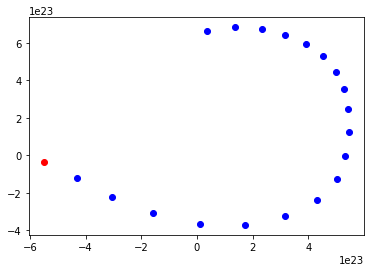

In [125]:
fig = plt.figure()
plt.plot(d[-1,0], d[-1,1], 'ro')
plt.plot(d[:-1,0], d[:-1,1], 'bo')

Plot in the xz-plane:

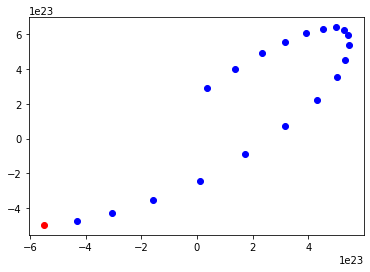

In [126]:
fig = plt.figure()
plt.plot(d[-1,0], d[-1,2], 'ro')
plt.plot(d[:-1,0], d[:-1,2], 'bo')

Plot in the yz-plane:

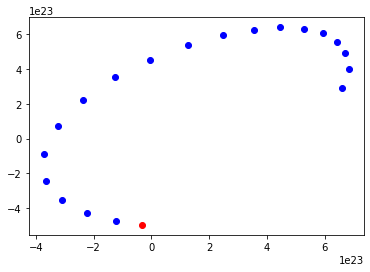

In [127]:
fig = plt.figure()
plt.plot(d[-1,1], d[-1,2], 'ro')
plt.plot(d[:-1,1], d[:-1,2], 'bo')